# Multiple Linear Regression

## Boston data

* __설명변수 (13개, 연속형)__

– CRIM: per capita crime rate by town  
– ZN: proportion of residential land zoned for lots over 25,000 sq.ft.  
– INDUS: proportion of non-retail business acres per town  
– CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
– NOX: nitric oxides concentration (parts per 10 million)  
– RM: average number of rooms per dwelling  
– AGE: proportion of owner-occupied units built prior to 1940  
– DIS: weighted distances to five Boston employment centres  
– RAD: index of accessibility to radial highways  
– TAX: full-value property-tax rate per $10,000  
– PTRATIO: pupil-teacher ratio by town  
– B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town  
– LSTAT: % lower status of the population  
    
* __종속변수 (연속형)__

– MEDV Median value of owner-occupied homes in $1000’s

## 1. sklearn model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1) data load

In [2]:
boston = load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
# 설명 변수 (연속형)
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 2) data split
train data를 train, validation data로 나눔 (test_size = 몇 퍼센트를 validation data로 사용할지)

In [5]:
# train data를 train, validation data로 나눔 (test_size = 몇 퍼센트를 validation data로 사용할지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1016)

### 3) model fitting
fit_intercept = 상수항 옵션  
model.coef_ = 회귀계수  
model.intercept_ = 상수항

In [6]:
model_lr_sk = LinearRegression(fit_intercept=True)

In [7]:
model_lr_sk = model_lr_sk.fit(X_train, y_train)

In [8]:
model_lr_sk.coef_

array([-8.67317104e-02,  5.29997304e-02, -2.48864499e-02,  2.60564003e+00,
       -2.16653966e+01,  3.14316298e+00,  5.57753733e-03, -1.78851007e+00,
        3.43749776e-01, -1.25277971e-02, -9.93282870e-01,  1.07730185e-02,
       -5.71746415e-01])

In [9]:
model_lr_sk.intercept_

44.61791907374586

### 4) test
평가지표 : mse

In [10]:
y_pred = model_lr_sk.predict(X_test)

In [11]:
mse = np.mean((y_test - y_pred)**2)

In [12]:
mse

16.194138635903858

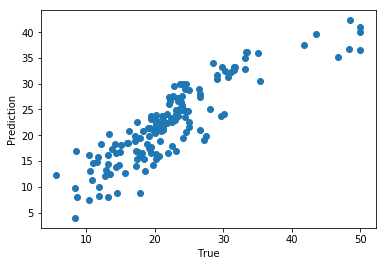

In [13]:
# 예측값과 실제값에 대한 plot -> 직선에 가까울수록 좋음

plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

## 2. Statsmodels

In [14]:
import statsmodels.api as sm
import pandas as pd

### 1) data load
데이터프레임 형태로 데이터 로드  
상수항 계산을 위해서 데이터프레임 맨 앞을 1로 채움

In [15]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)

In [16]:
dfX.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [18]:
dfy.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 2) data split

In [19]:
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX, dfy, test_size=0.3, random_state=1016)

### 3) model fitting

In [20]:
model_lr_sm = sm.OLS(dfy_train, dfX_train)
model_lr_sm = model_lr_sm.fit()

In [21]:
model_lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     68.50
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           1.34e-86
Time:                        20:49:37   Log-Likelihood:                -1070.6
No. Observations:                 354   AIC:                             2169.
Df Residuals:                     340   BIC:                             2223.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6179      6.512      6.851      0.000      31.808      57.428
CRIM          -0.0867      0.045     -1.947      0.052      -0.174       0.001
ZN             0.0530      0.018      3.009      0.003       0.018       0.088
INDUS         -0.0249      0.076     -0.329      0.742      -0.174       0.124
CHAS           2.6056      1.045      2.495      0.013       0.551       4.660
NOX          -21.6654      4.757     -4.555      0.000     -31.022     -12.309
RM             3.1432      0.516      6.096      0.000       2.129       4.157
AGE            0.0056      0.017      0.326      0.744      -0.028       0.039
DIS           -1.7885      0.267     -6.700      0.000      -2.314      -1.263
RAD            0.3437      0.084      4.111      0.000       0.179       0.508
TAX           -0.0125      0.005     -2.726      0.007      -0.022      -0.003
PTRATIO       -0.9933      0.174     -5.714      0.000      -1.335      -0.651
B              0.0108      0.003      3.234      0.001       0.004       0.017
LSTAT         -0.5717      0.063     -9.094      0.000      -0.695      -0.448
==============================================================================
Omnibus:                      113.843   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.006
Skew:                           1.407   Prob(JB):                     1.02e-86
Kurtosis:                       7.350   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model_lr_sm.params

const      44.617919
CRIM       -0.086732
ZN          0.053000
INDUS      -0.024886
CHAS        2.605640
NOX       -21.665397
RM          3.143163
AGE         0.005578
DIS        -1.788510
RAD         0.343750
TAX        -0.012528
PTRATIO    -0.993283
B           0.010773
LSTAT      -0.571746
dtype: float64

### 4) test

In [23]:
## testing
y_pred = model_lr_sm.predict(dfX_test)

In [24]:
# mse 산출
mse = np.mean((dfy_test.MEDV - y_pred)**2)

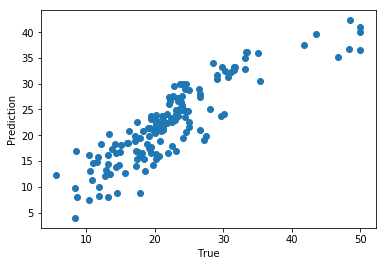

In [25]:
# plot
plt.scatter(dfy_test, y_pred)
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

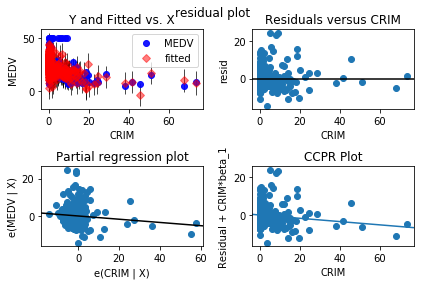

In [26]:
## varifying -> residual plot
fig = sm.graphics.plot_regress_exog(model_lr_sm, "CRIM")
fig.suptitle("residual plot")
plt.show()